In [ ]:
Le but de ce notebook est de travailler sur le problème d'enclenchement. Ce problème nous permettra d'avoir des conditions initiales correctes afin de pouvoir lancer le problème d'optimisation. 

Comme problème d'enclenchement, nous avons choisi d'utiliser K-means. 

Le but est de rassembler les villes proches en groupe afin de pouvoir démarrer avec un ou plusieurs satellite juste au-dessus de chaque groupe de villes. Ensuite, on va évaluer le poids de chaque groupe comme étant le nombre d'habitant de chaque groupe et en fonction de ce poids, on va installer un nombre de sattelites au dessus de chaque groupe.

Dans un premier temps, on charge les données de l'afrique

In [94]:
import pandas as pd

# Remplacez 'nom_du_fichier.csv' par le chemin de votre fichier CSV
data = pd.read_csv("cities_africa.csv", sep = ";")
data_clean = data[['Name', 'Population', 'Coordinates']]  # Remplacez 'colonne1', 'colonne2', 'colonne3' par les noms de vos colonnes
nouvelles_colonnes = data['Coordinates'].str.split(',', expand=True)

# Renommer les nouvelles colonnes
nouvelles_colonnes.columns = ['lon', 'lat']

# Concaténer les nouvelles colonnes avec le DataFrame d'origine en supprimant la colonne d'origine
data_clean = pd.concat([data_clean, nouvelles_colonnes], axis=1).drop(columns=['Coordinates'])


import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import numba


yp = data_clean["lon"] 
yp = np.array(yp)
yp = yp.astype(float)
xp = data_clean["lat"]  
xp = np.array(xp)
xp = xp.astype(float)
population = data_clean["Population"]
population = np.array(population)
population = population.astype(float)
#population = np.random.randint(1, 501, size=len(xp))



P = np.vstack((xp, yp)).T


In [96]:
n_tab = np.arange(2, 50)
s = np.zeros(len(n_tab))



"""for i in range(len(n_tab)) :  
    # Appliquer l'algorithme K-means
    kmeans = KMeans(n_clusters=n_tab[i], init = "k-means++", n_init = 5)
    #n_clusters = nombre de clusters avec lequel on travaille
    #init = méthode d'initialisation des centroides, "random" ça veut dire que les centroides sont placés en mode random et "k-means++" c'est une méthode qui donne des centroides optimisés
    #n_init = nombre de fois que l'algorithme va tourner et donner la meilleure solution


    kmeans.fit(P, sample_weight = population)
    y_kmeans = kmeans.predict(P, sample_weight = population)


"""
#plt.plot(n_tab, s)
#n_max = n_tab[np.where(np.in1d(s, np.max(s)))[0]][0]


kmeans = KMeans(n_clusters=20, init = "k-means++", n_init = 5)
    #n_clusters = nombre de clusters avec lequel on travaille
    #init = méthode d'initialisation des centroides, "random" ça veut dire que les centroides sont placés en mode random et "k-means++" c'est une méthode qui donne des centroides optimisés
    #n_init = nombre de fois que l'algorithme va tourner et donner la meilleure solution


kmeans.fit(P,sample_weight = population)
y_kmeans = kmeans.predict(P, sample_weight = population)

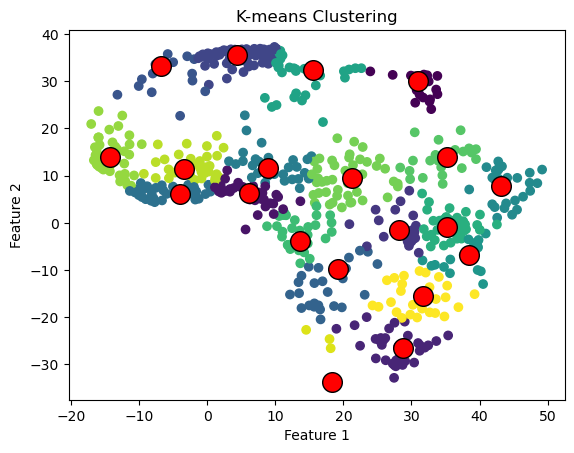

In [97]:
# Visualiser les clusters
plt.scatter(P[:, 0], P[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='o', s=200, edgecolor='k', c='red')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Comment on peut voir sur ce graph, le silhouette score ne nous plaît pas, en effet, si l'on se base sur le silhouette score, on a que 6 clusters est le meilleur choix alors qu'il est clair que non.

On va donc essayer deux choses diffèrentes : 

- la première consiste à donner plus d'importance aux villes plus peuplées. 
- la seconde consiste à inventer notre propre score

Première façon : 

In [86]:



population_kmeans = population + 1
population_kmeans = population_kmeans.astype(int)

P_copy = P.copy()

for i in range(len(P_copy)) : 
    numb_to_add = population_kmeans[i] - 1
    matrice = np.tile(P[i], (numb_to_add, 1))
    P = np.vstack((P, matrice))

print(np.max(population_kmeans))
    

KeyboardInterrupt: 

Donc en gros ici, on a démultiplié d'un nombre proportionnel de fois à la population les points afin de donner plus d'importance aux points ayant une grande population

Silhouette score pour n = 2 : 0.46745014253565687
Silhouette score pour n = 3 : 0.4938445106515618
Silhouette score pour n = 4 : 0.5350117319745654
Silhouette score pour n = 5 : 0.5364375131114859
Silhouette score pour n = 6 : 0.5206201635902249
Silhouette score pour n = 7 : 0.5255444395967489
Silhouette score pour n = 8 : 0.5351104846951058
Silhouette score pour n = 9 : 0.5384621667167221
Silhouette score pour n = 10 : 0.5233672173335683
Silhouette score pour n = 11 : 0.5216927789067263
Silhouette score pour n = 12 : 0.5346861063261537
Silhouette score pour n = 13 : 0.525759516276467
Silhouette score pour n = 14 : 0.5309578889140799
Silhouette score pour n = 15 : 0.5060436518142974
Silhouette score pour n = 16 : 0.5315566199442024
Silhouette score pour n = 17 : 0.512165213453097
Silhouette score pour n = 18 : 0.5374514711988422
Silhouette score pour n = 19 : 0.5043683792324422
Silhouette score pour n = 20 : 0.5326821928721421
Silhouette score pour n = 21 : 0.5328777723616502
Silhouett

Silhouette score pour n = 165 : 0.6475427720036444
Silhouette score pour n = 166 : 0.6533090111042406
Silhouette score pour n = 167 : 0.6383253665057579
Silhouette score pour n = 168 : 0.649097187311991
Silhouette score pour n = 169 : 0.6455619800607901
Silhouette score pour n = 170 : 0.6461157159782716
Silhouette score pour n = 171 : 0.6494792519988406
Silhouette score pour n = 172 : 0.6481571448608716
Silhouette score pour n = 173 : 0.6533276766997481
Silhouette score pour n = 174 : 0.6533058569893401
Silhouette score pour n = 175 : 0.6481997312604856
Silhouette score pour n = 176 : 0.6597948957077007
Silhouette score pour n = 177 : 0.6496103579936351
Silhouette score pour n = 178 : 0.6517058078594732
Silhouette score pour n = 179 : 0.6519604611679151
Silhouette score pour n = 180 : 0.6616020559014356
Silhouette score pour n = 181 : 0.6602482377751422
Silhouette score pour n = 182 : 0.6616581127615911
Silhouette score pour n = 183 : 0.6657002439268632
Silhouette score pour n = 184 : 

Silhouette score pour n = 327 : 0.7705616427737138
Silhouette score pour n = 328 : 0.7712599522491425
Silhouette score pour n = 329 : 0.7692397560475984
Silhouette score pour n = 330 : 0.7685255086034826
Silhouette score pour n = 331 : 0.7611561086182287
Silhouette score pour n = 332 : 0.7667717362317604
Silhouette score pour n = 333 : 0.7719492484981183
Silhouette score pour n = 334 : 0.7716250120297617
Silhouette score pour n = 335 : 0.7745633939508203
Silhouette score pour n = 336 : 0.7713243834282857
Silhouette score pour n = 337 : 0.7675337454979847
Silhouette score pour n = 338 : 0.7670049446425392
Silhouette score pour n = 339 : 0.7812516182115183
Silhouette score pour n = 340 : 0.7711865728360583
Silhouette score pour n = 341 : 0.7711414411770512
Silhouette score pour n = 342 : 0.7740273496855429
Silhouette score pour n = 343 : 0.776904168627107
Silhouette score pour n = 344 : 0.7765305411053686
Silhouette score pour n = 345 : 0.7716244709635679
Silhouette score pour n = 346 : 

Silhouette score pour n = 489 : 0.819820774302417
Silhouette score pour n = 490 : 0.8232099191046286
Silhouette score pour n = 491 : 0.8206858766526542
Silhouette score pour n = 492 : 0.8263526491298022
Silhouette score pour n = 493 : 0.8252012821387528
Silhouette score pour n = 494 : 0.8259992534622638
Silhouette score pour n = 495 : 0.8267639425858415
Silhouette score pour n = 496 : 0.8270220470020437
Silhouette score pour n = 497 : 0.8260617328862999
Silhouette score pour n = 498 : 0.8280655239342906
Silhouette score pour n = 499 : 0.8295555976446795
Silhouette score pour n = 500 : 0.8344454569274539
Silhouette score pour n = 501 : 0.8246830039964667
Silhouette score pour n = 502 : 0.8279123684792177
Silhouette score pour n = 503 : 0.8263423914897846
Silhouette score pour n = 504 : 0.8275496930723045
Silhouette score pour n = 505 : 0.8307928105234492
Silhouette score pour n = 506 : 0.8300249943935919
Silhouette score pour n = 507 : 0.8299038886976015
Silhouette score pour n = 508 : 

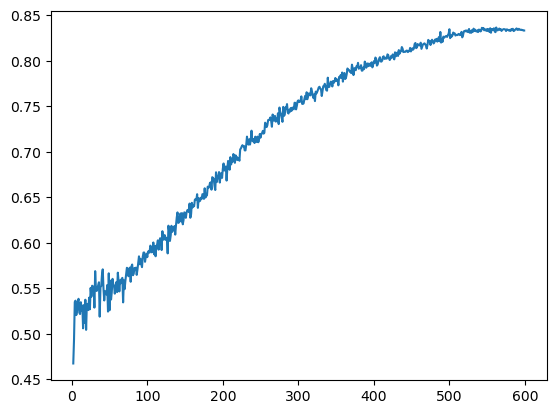

In [67]:
import numba

n_tab = np.arange(2, 600)
s = np.zeros(len(n_tab))



for i in range(len(n_tab)) :  
    # Appliquer l'algorithme K-means
    kmeans = KMeans(n_clusters=n_tab[i], init = "k-means++", n_init = 'auto')
    #n_clusters = nombre de clusters avec lequel on travaille
    #init = méthode d'initialisation des centroides, "random" ça veut dire que les centroides sont placés en mode random et "k-means++" c'est une méthode qui donne des centroides optimisés
    #n_init = nombre de fois que l'algorithme va tourner et donner la meilleure solution


    kmeans.fit(P)
    y_kmeans = kmeans.predict(P)

    
    s[i] = metrics.silhouette_score(P,y_kmeans)
    print("Silhouette score pour n = " + str(n_tab[i]) + " : " + str(s[i]))

plt.plot(n_tab, s)
n_max = n_tab[np.where(np.in1d(s, np.max(s)))[0]][0]


kmeans = KMeans(n_clusters=n_max, init = "k-means++", n_init = 5)
    #n_clusters = nombre de clusters avec lequel on travaille
    #init = méthode d'initialisation des centroides, "random" ça veut dire que les centroides sont placés en mode random et "k-means++" c'est une méthode qui donne des centroides optimisés
    #n_init = nombre de fois que l'algorithme va tourner et donner la meilleure solution


kmeans.fit(P)
y_kmeans = kmeans.predict(P)

Sachant que il y a 650 villes dans le dataset, ce test ne me semble pas tant concluant que ça.

Nous allons donc exploré la seconde idée qui consiste à utiliser DBSCAN avec le poids des points

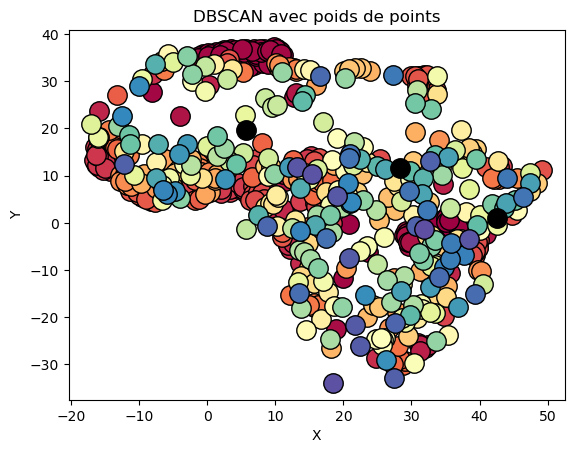

In [93]:
from sklearn.cluster import DBSCAN

# Utiliser DBSCAN avec la fonction de distance personnalisée
dbscan = DBSCAN(eps=1, min_samples=2)
dbscan.fit(P, sample_weight=population)

labels = dbscan.labels_
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Points non regroupés (bruit)
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = P[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('DBSCAN avec poids de points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

HDBSCAN